In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
sns.set_theme(style='dark')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import nltk
import nltk
import re
import geograpy


nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('maxent_ne_chunker_tab')

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vineetasinha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/vineetasinha/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vineetasinha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vineetasinha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vineetasinha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/vineetasinha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-


In [2]:
with open('historic_events_contents.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')


In [3]:
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)


['Historic Key Events "The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century[edit] The world at the beginning of the century[edit] Main article: Edwardian era The new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.', '""The war to end all wars"": World War I (1914–1918)[edit] Main article: World War I Arrest of a suspec

In [4]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)


['Historic', 'Key', 'Events', '``', 'The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'era', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 

In [5]:
# Looking innto frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)


<FreqDist with 4690 samples and 21206 outcomes>


In [6]:
# 10 most common words

dist_words.most_common(10)


[('.', 1579),
 ('the', 1079),
 (',', 984),
 ("''", 707),
 ('of', 593),
 ('and', 394),
 ('``', 391),
 ('The', 318),
 ('to', 318),
 ('[', 302)]

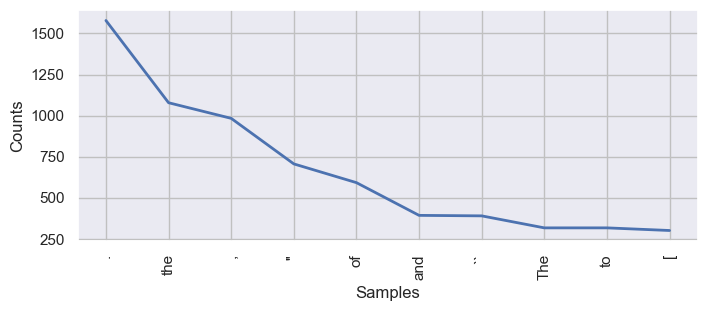

In [7]:
plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()


In [8]:
stop_words = set(stopwords.words('english'))

Filtered_words = [] # creates an empty list
for word in tokenized_word:
      if word not in stop_words:
           Filtered_words.append(word)


In [9]:
Dist_words_filter = FreqDist(Filtered_words)
print (Dist_words_filter)


<FreqDist with 4586 samples and 16614 outcomes>


In [10]:
Dist_words_filter.most_common(10)

[('.', 1579),
 (',', 984),
 ("''", 707),
 ('``', 391),
 ('The', 318),
 ('[', 302),
 (']', 302),
 ('^', 268),
 ('(', 234),
 (')', 234)]

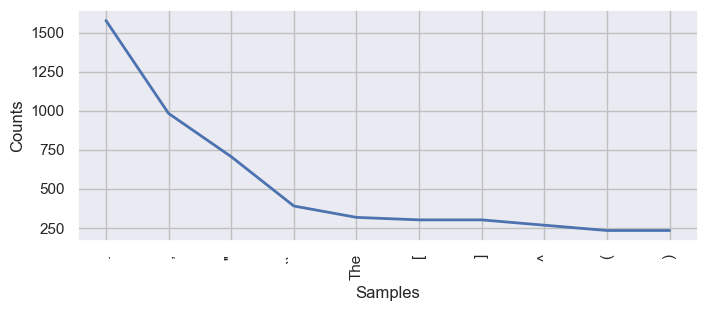

In [11]:
plt.figure(figsize=(8, 3))
Dist_words_filter.plot(10,cumulative = False)
plt.show()

In [12]:
# Most common strings in the text sample are mainly punctuation mark

In [13]:
sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(Filtered_words))

In [14]:
Tokenized_word_2 = word_tokenize(sans_punc)
print (Tokenized_word_2)


['Historic', 'Key', 'Events', 'The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'The', 'world', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'The', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'From', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'edit', 'Main', 'article'

In [15]:
dist_words_filter_2 = FreqDist(Tokenized_word_2)


In [16]:
new_stopwords = ['And', 'Then', 'n', 't', 's', 'The']


In [17]:
filtered = []
for word in Tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)



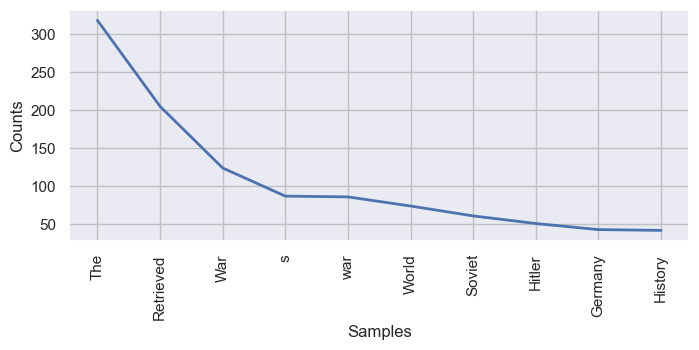

In [18]:
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10,cumulative = False)
plt.show()


In [19]:
%%time
text = TextBlob(str(filtered))


CPU times: user 7.34 ms, sys: 765 μs, total: 8.1 ms
Wall time: 11.5 ms


In [20]:
tags_list = text.tags

cleaned_tags_list = [(word.replace("'", ""), pos) for word, pos in tags_list]

In [21]:
cleaned_tags_list

[('[', 'JJ'),
 ('Historic', 'NNP'),
 ('', 'POS'),
 ('Key', 'NNP'),
 ('', 'POS'),
 ('Events', 'NNS'),
 ('', 'POS'),
 ('th', 'NNP'),
 ('', 'POS'),
 ('century', 'NNP'),
 ('', 'POS'),
 ('changed', 'VBD'),
 ('world', 'NNP'),
 ('', 'POS'),
 ('unprecedented', 'VBD'),
 ('ways', 'NNS'),
 ('', 'POS'),
 ('World', 'NNP'),
 ('', 'POS'),
 ('Wars', 'NNS'),
 ('', 'POS'),
 ('sparked', 'VBD'),
 ('tension', 'NNP'),
 ('', 'POS'),
 ('countries', 'NNS'),
 ('', 'POS'),
 ('led', 'VBD'),
 ('creation', 'NNP'),
 ('', 'POS'),
 ('atomic', 'NNP'),
 ('', 'POS'),
 ('War', 'NNP'),
 ('', 'POS'),
 ('led', 'VBD'),
 ('Space', 'NNP'),
 ('', 'POS'),
 ('Race', 'NNP'),
 ('', 'POS'),
 ('creation', 'NN'),
 ('space', 'NNP'),
 ('', 'POS'),
 ('based', 'VBD'),
 ('rockets', 'NNS'),
 ('', 'POS'),
 ('World', 'NNP'),
 ('', 'POS'),
 ('Wide', 'NNP'),
 ('', 'POS'),
 ('Web', 'NNP'),
 ('', 'POS'),
 ('created', 'VBD'),
 ('These', 'JJ'),
 ('advancements', 'NNS'),
 ('', 'POS'),
 ('significant', 'NNP'),
 ('', 'POS'),
 ('role', 'NNP'),
 ('', 'PO

In [22]:
df_text = pd.DataFrame(cleaned_tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')


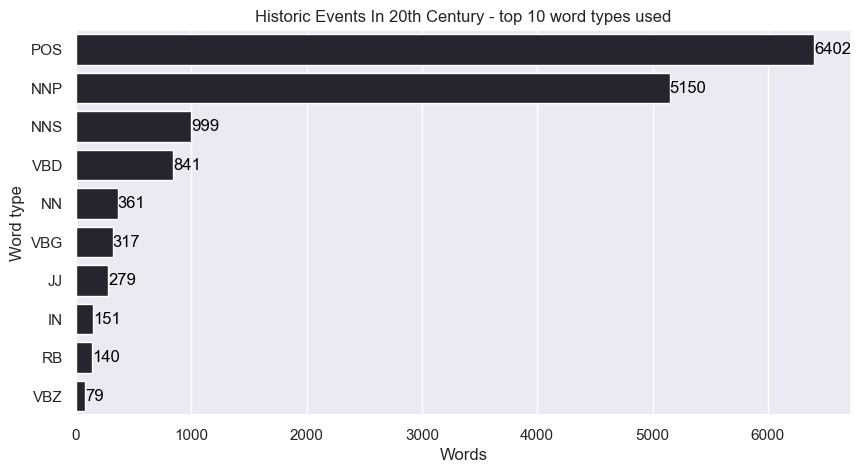

In [23]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      ax=sns.barplot(x = "Words", y = "Word type",saturation = 0.9, data = top10)
      ax.set_title("Historic Events In 20th Century - top 10 word types used")

for index, value in enumerate(top10['Words']):
        ax.text(value, index, f'{value}', color='black', va="center")
plt.show()

In [24]:
legend_labels = {
    'NNP': 'Proper Noun, Singular',
    'NNS': 'Noun, Plural',
    'NN': 'Noun, Singular',
}


In [25]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences')


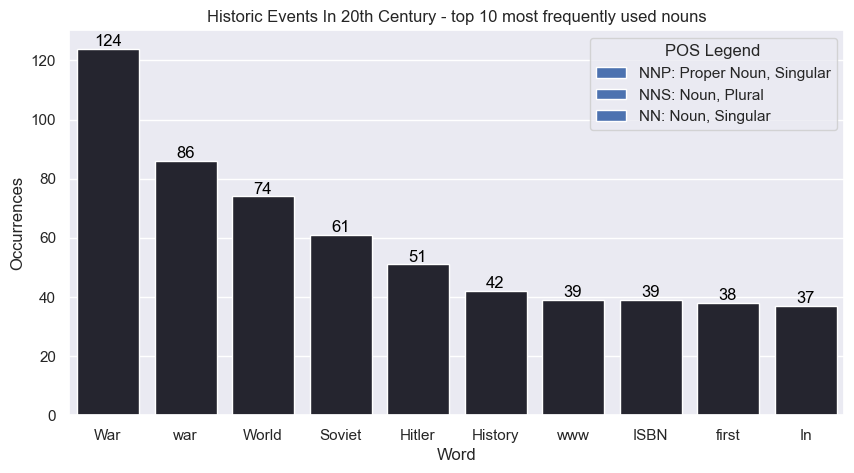

In [26]:

plt.figure(figsize=(10, 5))

with sns.dark_palette("xkcd:blue", 10):
      ax = sns.barplot(x="Word", y="Occurrences",saturation=0.9, data = top10)
      ax.set_title("Historic Events In 20th Century - top 10 most frequently used nouns")
    
for index, row in top10.iterrows():
    ax.text(row['Word'], row['Occurrences'], f'{row["Occurrences"]}', color='black', ha='center', va='bottom')

handles = [mpatches.Patch(label=f'{key}: {value}') for key, value in legend_labels.items()]
ax.legend(handles=handles, title="POS Legend")
plt.show()


In [27]:
legend_labels = {
    'VB': 'Verb',   
}

In [28]:
df_verb = df_text[df_text['Word type'].str.startswith("VB")]
df_verb.columns = ["Word", "Occurrences"]
x = df_verb.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences')

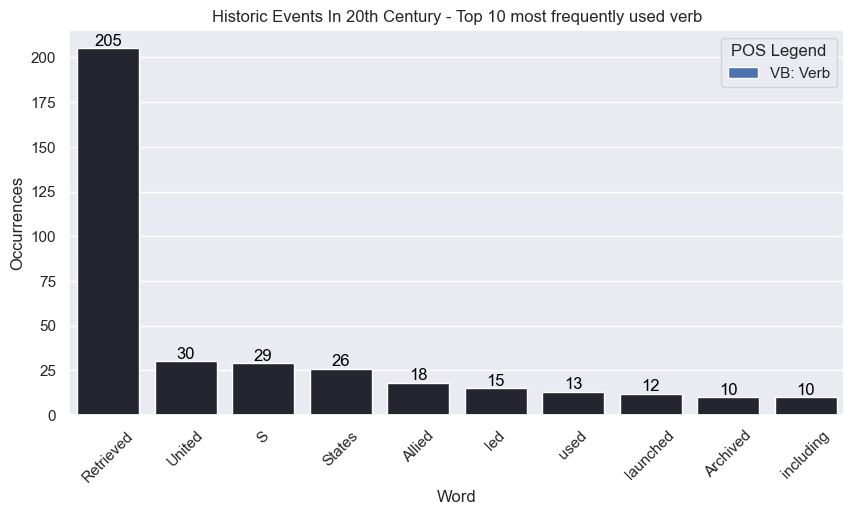

In [29]:
plt.figure(figsize=(10, 5))

with sns.dark_palette("xkcd:blue", 10):
      ax = sns.barplot(x="Word", y="Occurrences",saturation=0.9, data = top10)
      ax.set_title("Historic Events In 20th Century - Top 10 most frequently used verb")
for index, row in top10.iterrows():
    ax.text(row['Word'], row['Occurrences'], f'{row["Occurrences"]}', color='black', ha='center', va='bottom')

handles = [mpatches.Patch(label=f'{key}: {value}') for key, value in legend_labels.items()]
ax.legend(handles=handles, title="POS Legend")


plt.xticks(rotation=45)
plt.show()


In [30]:
legend_labels = {
    'JJ': 'Adjective',   
}

In [31]:
df_adjective = df_text[df_text['Word type'].str.startswith("JJ")]
df_adjective.columns = ["Word", "Occurrences"]
x = df_adjective.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15 = y.nlargest(15, 'Occurrences')

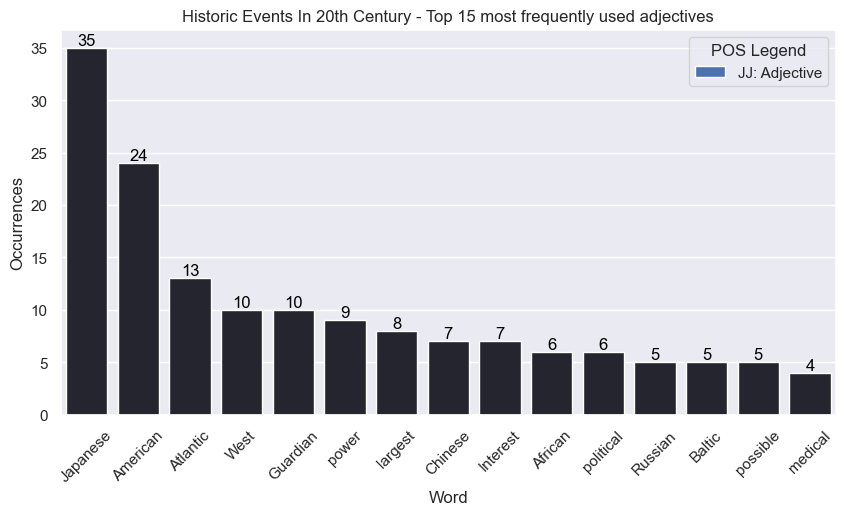

In [32]:
plt.figure(figsize=(10, 5))

with sns.dark_palette("xkcd:blue", 10):
      ax = sns.barplot(x="Word", y="Occurrences",saturation=0.9, data = top15)
      ax.set_title("Historic Events In 20th Century - Top 15 most frequently used adjectives")
for index, row in top15.iterrows():
    ax.text(row['Word'], row['Occurrences'], f'{row["Occurrences"]}', color='black', ha='center', va='bottom')

handles = [mpatches.Patch(label=f'{key}: {value}') for key, value in legend_labels.items()]
ax.legend(handles=handles, title="POS Legend")   
    
plt.xticks(rotation=45)
plt.show()


In [33]:
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Historic Key Events th century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped st century today Historic events th century edit world beginning century edit Main article Edwardian era new beginning th century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting From First World War aftermath caused major changes power balance world destroying transforming powerful empires war end wars World War I edit Main article World War I Arrest suspect Sarajevo following Assassination Archduke Franz Ferdinand First World War simply WWI termed Great War contemporaries started ended war extension century whole ignited Assassination Sarajevo Austro Hungarian Empire heir throne Erzherzog Franz Ferdinand Gavrilo Princip organization Young Bosnia Bosnian Serbs

In [34]:
url = 'https://en.wikipedia.org/wiki/Key_events_of_the_20th_century'
places = geograpy.get_geoPlace_context(url=url)
COUNTRY_NAMES = places.countries

In [35]:
print(COUNTRY_NAMES)

['Israel', 'Italy', 'Angola', 'Latvia', 'Poland', 'Finland', 'India', 'Thailand', 'Egypt', "People's Republic of China", 'Cambodia', 'Cuba', 'Iran', 'Australia', 'Hungary', 'France', 'South Korea', 'Russia', 'Philippines', 'Vietnam', 'Luxembourg', 'Laos', 'Austria', 'South Africa', 'Mongolia', 'Romania', 'Norway', 'Japan', 'Kenya', 'Myanmar', 'Pakistan', 'Lithuania', 'North Korea', 'Germany', 'Belarus', 'Ukraine', 'United States of America', 'Singapore', 'Algeria', 'Iraq', 'Solomon Islands', 'Seychelles', 'Bulgaria', 'United Kingdom', 'Canada', 'Greece', 'Belgium', 'Estonia', 'Bangladesh', 'Serbia', 'Czech Republic', 'Bosnia and Herzegovina', 'Libya', 'Argentina', 'Lesotho', 'Honduras', 'Colombia', 'Portugal', 'Moldova', 'Sweden', 'North Macedonia', 'Indonesia', 'Spain', 'Switzerland', 'Costa Rica', 'Albania', 'Kiribati', 'Denmark', 'Panama', 'Mexico', 'Netherlands', 'Georgia', 'Venezuela', 'New Zealand']


In [36]:
# Create a dictionary to store the counts
counts = {country: 0 for country in COUNTRY_NAMES}


def find_text_occurrences(paragraph, search_texts):
    # Split the paragraph into words
    words = paragraph.split()
    
    # Initialize a dictionary to store occurrences
    occurrences = {text: 1 for text in search_texts}
    
    # Loop through the words to find occurrences of each search text
    for word in words:
        # Check if the word is in the search_texts list
        if word in occurrences:
            # Increment the occurrence count for that word
            occurrences[word] += 1
        occurrences_df = pd.DataFrame(list(occurrences.items()), columns=['Country', 'Occurrences'])

    return occurrences_df


result = find_text_occurrences(listToStr, COUNTRY_NAMES)

print(result)



        Country  Occurrences
0        Israel            5
1         Italy           15
2        Angola            2
3        Latvia            3
4        Poland           14
..          ...          ...
69       Mexico            2
70  Netherlands            3
71      Georgia            1
72    Venezuela            1
73  New Zealand            1

[74 rows x 2 columns]


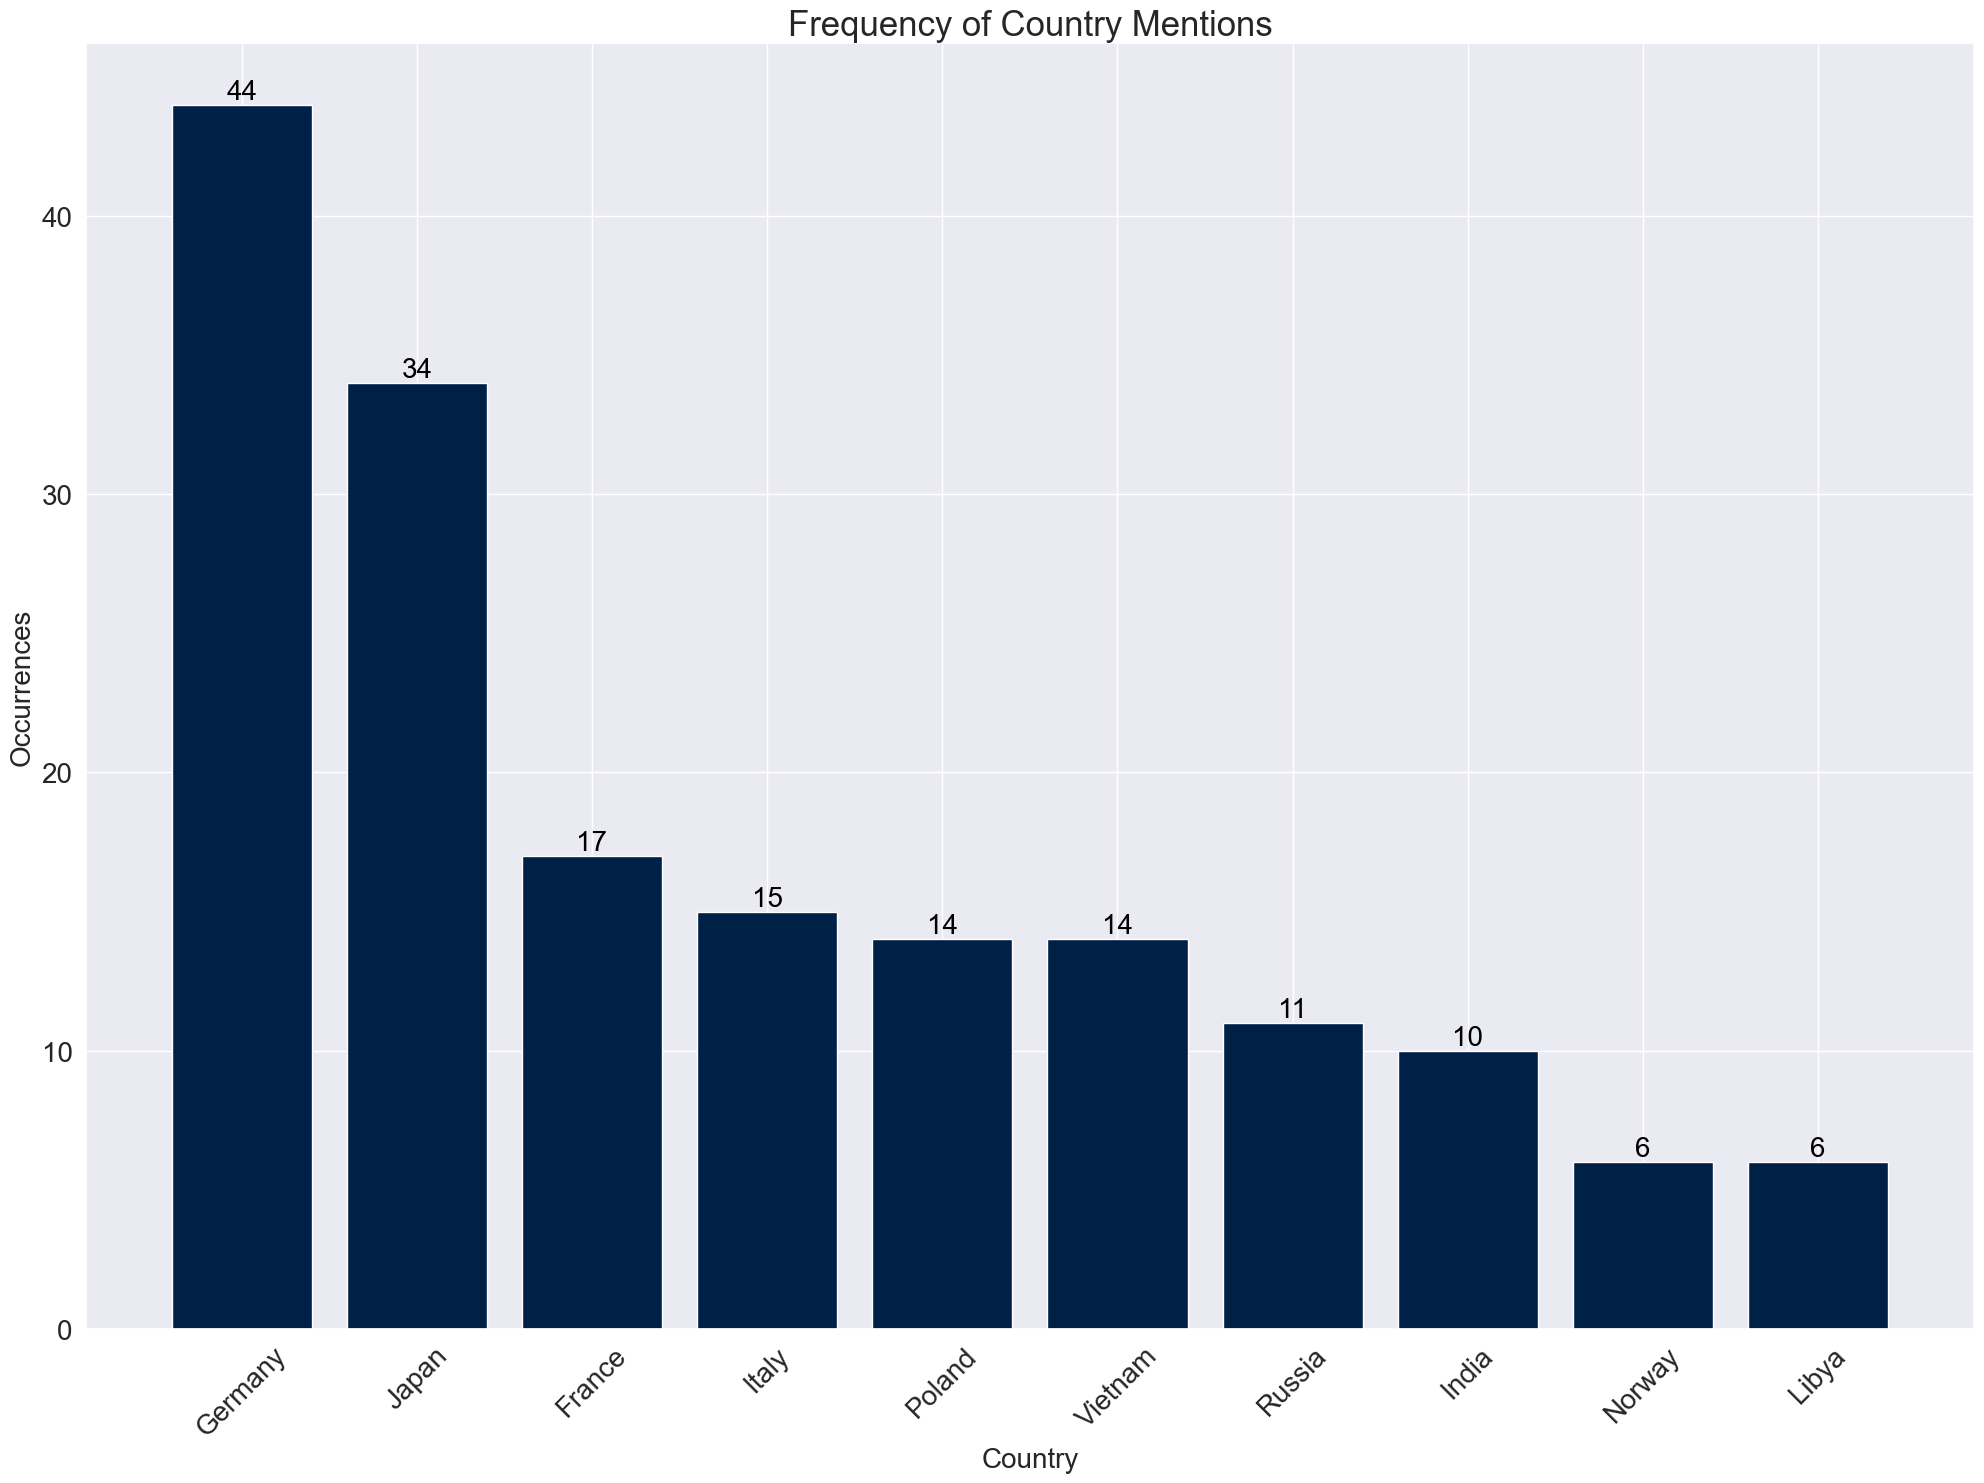

In [37]:
def plot_occurrences(occurrences_df,top_n=10):
    sorted_df = occurrences_df.sort_values(by='Occurrences', ascending=False)

    # Plotting the data
    top_df = sorted_df.head(top_n)
    # print(top_df)

    plt.figure(figsize=(20, 15))
    bars = plt.bar(top_df['Country'], top_df['Occurrences'], color='#002147')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=20)

    plt.xlabel('Country',fontsize=20)
    plt.ylabel('Occurrences',fontsize=20)
    plt.title('Frequency of Country Mentions',fontsize=25)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()
plot_occurrences(result, top_n=10)


In [38]:
# Observation
# **Frequency Distribution**:
   #The plot clearly shows that "Germany" is mentioned the most frequently, with a total of 44 occurrences in the entire page.
   #"Japan" is the second most frequently mentioned country, appearing 34 times.
   

In [39]:
result.to_csv('../documents/workspace/Countries-Occurences.txt', sep='\t', index=False)
